In [ ]:
df.shape

(270262, 16)

In [ ]:
#1. Data Cleaning Questions:

# 1.1 How many missing values exist in the dataset, and in which columns?
missing_values=df.isnull().sum()
print(missing_values)

VIN (1-10)                                             0
County                                                10
City                                                  10
State                                                  0
Postal Code                                           10
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         5
Legislative District                                 649
DOL Vehicle ID                                         0
Vehicle Location                                      88
Electric Utility                                      10
2020 Census Tract                                     10
dtype: int64


In [ ]:
import pandas as pd
URL = " https://data.wa.gov/api/views/f6w7-q2d2/rows.csv"
df=pd.read_csv(URL)
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270257,1C4RJXN60R,Pierce,Joint Base Lewis Mcchord,WA,98433.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,28.0,266021122,POINT (-122.60761 47.08798),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
270258,1C4JJXR66N,Mason,Hoodsport,WA,98548.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,35.0,282482938,POINT (-123.14135 47.40639),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
270259,7SAYGDEEXP,Pierce,Tacoma,WA,98406.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,27.0,228485085,POINT (-122.52082 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
270260,5YJYGDEE2M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,1.0,282699217,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
#1.2 How should missing or zero values in the Base MSRP and Electric Range columns be handled?

# The column 'Base MSRP' was not found in the DataFrame.
# Original instruction: Replace missing values in Base MSRP with average MSRP of similar vehicles

# df['Base MSRP']=df.groupby(['Make','Model'])['Base MSRP'].transform(lambda x: x.fillna(x.mean()))

#Replace missing values in Electric Range with average Electric Range of similar vehicles

df['Electric Range']=df.groupby(['Make','Model'])['Electric Range'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
#1.3Are there duplicate records in the dataset? If so, how should they be managed?
#check for duplicate records
duplicates = df.duplicated().sum()
print(duplicates)

# Drop duplicate records

df=df.drop_duplicates()

#1.4 How can VINs be anonymized while maintaining uniqueness?

import hashlib

#Anonymize VINs using SHA-256 hashing

df['VIN (1-10)'] = df['VIN (1-10)'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())




0


In [ ]:
#1.5 How can Vehicle Location (GPS coordinates) be cleaned or converted for better readability?

# !pip install --upgrade --force-reinstall geopy
# from geopy.geocoders import Nominatim
# Create a geolocator object
# geolocator = Nominatim(user_agent='electric_vehicle_data')

# import pandas as pd
# import re

# Extract Latitude and Longitude from 'Vehicle Location'
# def extract_coords(location_str):
    # if isinstance(location_str, str):
       #  match = re.search(r'POINT \(([-+]?\d+\.?\d*)\s+([-+]?\d+\.?\d*)\)', location_str)
       #  if match:
            # POINT format is Longitude Latitude
           #  longitude = float(match.group(1))
           #  latitude = float(match.group(2))
           #  return latitude, longitude
   #  return None, None

# Apply the extraction and create new columns
##df[['Latitude', 'Longitude']] = df['Vehicle Location'].apply(lambda x: pd.Series(extract_coords(x)))

# Convert GPS Coordinates to human-readable addresses
##df['Address']=df.apply(lambda row: geolocator.reverse(f"{row['Latitude']}, {row['Longitude']}").address if pd.notna(row['Latitude']) and pd.notna(row['Longitude']) else None, axis=1)

In [ ]:
                                # DATA EXPLORATION QUESTINOS [ SECTION 2]


In [ ]:
#2.1 What are the top 5 most common EV makes and models in the dataset?
#2.2 What is the distribution of EVs by county? Which county has the most registrations?
#2.3 How has EV adoption changed over different model years?
#2.4 What is the average electric range of EVs in the dataset?
#2.5 What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives?
#2.6 How does the electric range vary across different makes and models?
#2.7 What is the average Base MSRP for each EV model?
#2.8 Are there any regional trends in EV adoption (e.g., urban vs. rural areas)?

In [ ]:
#2.1 What are the top 5 most common EV makes and models in the dataset?

#Get top 5 most common EV makes
top_makes=df['Make'].value_counts().head(5)
print(top_makes)

#Get top 5 most common EV Models
top_models=df['Model'].value_counts().head(5)
print(top_models)



Make
TESLA        111049
CHEVROLET     19032
NISSAN        15963
FORD          14819
KIA           13470
Name: count, dtype: int64
Model
MODEL Y    57335
MODEL 3    37413
LEAF       13503
MODEL S     7758
BOLT EV     7708
Name: count, dtype: int64


In [ ]:
#2.2 What is the distribution of EVs by county? Which county has the most registrations?

In [ ]:
#Get distribution of EVs by county

country_distribution=df['County'].value_counts()
print(country_distribution)

County
King          133903
Snohomish      33531
Pierce         22213
Clark          16553
Thurston        9852
               ...  
Stanislaus         1
Meade              1
Bernalillo         1
Greene             1
Boulder            1
Name: count, Length: 242, dtype: int64


In [ ]:
#2.3 How has EV adoption changed over different model years?

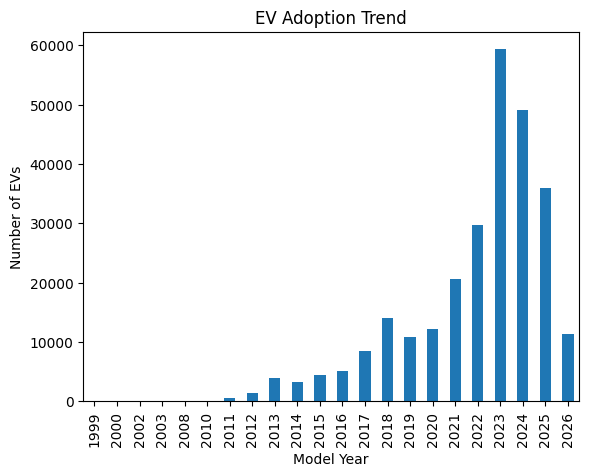

In [ ]:
#Get EV adoption trend by model year

import matplotlib.pyplot as plt

adoption_trend = df['Model Year'].value_counts().sort_index()
adoption_trend.plot(kind='bar')  # kind= line if you want in line
plt.title('EV Adoption Trend')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.show()

In [ ]:
#2.4 What is the average electric range of EVs in the dataset?

In [ ]:
#Get average electric range of EVs

average_range=df['Electric Range'].mean()
print(average_range)

40.38567760173461


In [ ]:
#2.5 What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives?


In [ ]:
# Get percentage of EVs eligible for CAFV incentives

cafv_eligibility = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100
print(cafv_eligibility)

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    62.854563
Clean Alternative Fuel Vehicle Eligible                         28.254065
Not eligible due to low battery range                            8.891372
Name: proportion, dtype: float64


In [ ]:
#2.6 How does the electric range vary across different makes and models?


In [ ]:
# Get average electric range by make and model

In [ ]:
range_variation=df.groupby(['Make','Model'])['Electric Range'].mean()
print(range_variation)


Make                  Model 
ACURA                 ZDX         0.000000
ALFA ROMEO            TONALE     33.000000
AUDI                  A3         16.000000
                      A6          0.000000
                      A7 E       24.000000
                                   ...    
VOLVO                 V60        38.742574
                      XC40        0.000000
                      XC60       28.689711
                      XC90       25.674016
WHEEGO ELECTRIC CARS  WHEEGO    100.000000
Name: Electric Range, Length: 183, dtype: float64


In [ ]:
#2.7 What is the average Base MSRP for each EV model?



In [ ]:
#average_Base_MSRP=df.groupby('Model')['Base MSRP'].mean()
#print(average_Base_MSRP)

#Base MSRP Column not present in Data Frame

In [ ]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [ ]:
#2.8 Are there any regional trends in EV adoption (e.g., urban vs. rural areas)?

# GET EV Adoption trend by country (urban vs rural areas)

regional_trend = df.groupby('County')['Model Year'].value_counts().unstack()
print(regional_trend)

Model Year  1999  2000  2002  2003  2008  2010  2011  2012  2013  2014  ...  \
County                                                                  ...   
Ada          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Adams        NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   1.0   3.0  ...   
Alameda      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albemarle    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0  ...   
Alexandria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
Williamson   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Worcester    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Yakima       NaN   NaN   NaN   NaN   NaN   NaN  11.0  21.0  27.0  36.0  ...   
York         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Yuba         NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [ ]:
                          # SECTION 3 Data Visualization Questions:

In [ ]:
#3. Data Visualization Questions:
#3.1 Create a bar chart showing the top 5 EV makes and models by count.
#3.2 Use a heatmap or choropleth map to visualize EV distribution by county.
#3.3 Create a line graph showing the trend of EV adoption by model year.
#3.4 Generate a scatter plot comparing electric range vs. base MSRP to see pricing trends.
#3.5 Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.
#3.6 Use a geospatial map to display EV registrations based on vehicle location.

Text(0, 0.5, 'Count')

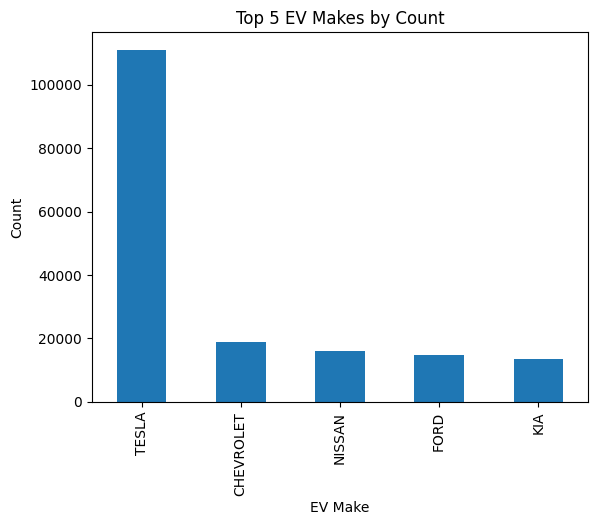

In [ ]:
#3.1 Create a bar chart showing the top 5 EV makes and models by count?

import matplotlib.pyplot as plt

# Get top 5 most common EV makes
top_makes = df['Make'].value_counts().head(5)
top_makes.plot(kind='bar')
plt.title('Top 5 EV Makes by Count')
plt.xlabel('EV Make')
plt.ylabel('Count')



In [ ]:
#3.2 Use a heatmap or choropleth map to visualize EV distribution by county.?

import folium

#create a map

m=folium.Map(location=[47.6062,-122.3321],zoom_start=7)

#add county boundaries

folium.Choropleth(geo_data='wa_counties.geojson',data=df['County'].value_counts()).add_to(m)

#display map
m

#add markers to the map

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

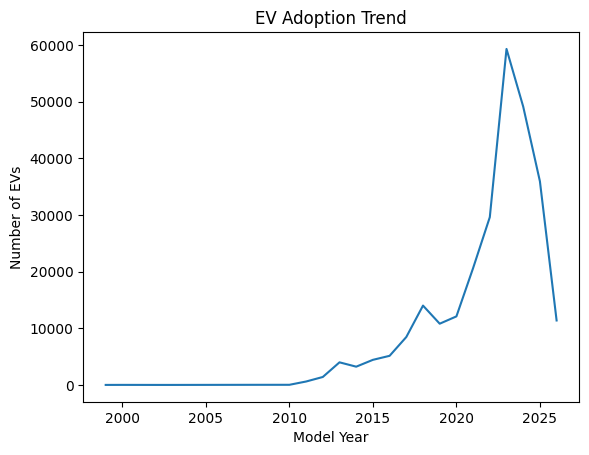

In [ ]:
#3.3 Create a line graph showing the trend of EV adoption by model year.?

import matplotlib.pyplot as plt

# Get EV adoption trend by model year
adoption_trend = df['Model Year'].value_counts().sort_index()
adoption_trend.plot(kind='line')  # kind= line if you want in line
plt.title('EV Adoption Trend')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.show()


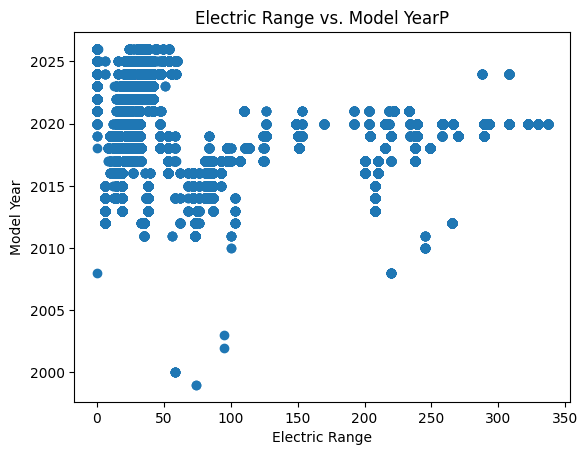

In [ ]:
#3.4 Generate a scatter plot comparing electric range vs. Model Year to see pricing trends.
# i use Model Year instead of base MSRP as base MSRP is not present in data frame

import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['Electric Range'], df['Model Year'])
plt.title('Electric Range vs. Model YearP')
plt.xlabel('Electric Range')
plt.ylabel('Model Year')
plt.show()


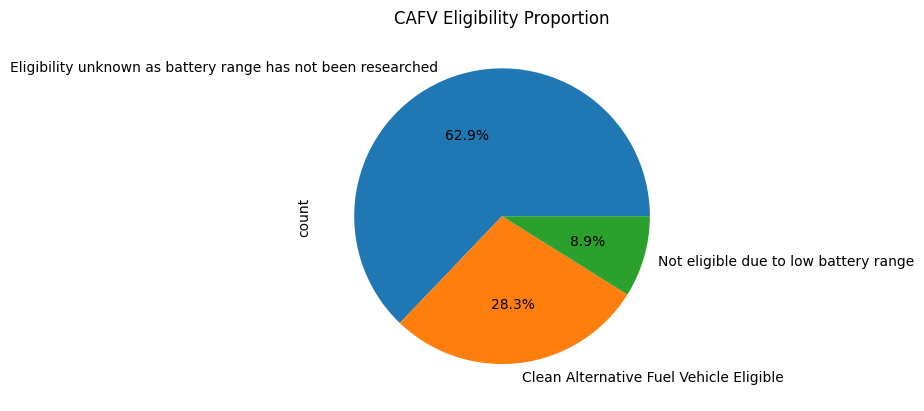

In [ ]:
#3.5 Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.?

import matplotlib.pyplot as plt

# Get proportion of CAFV-eligible vs. non-eligible EVs
cafv_eligibility = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
cafv_eligibility.plot(kind='pie', autopct='%1.1f%%')
plt.title('CAFV Eligibility Proportion')
plt.show()




In [ ]:
#3.6 Use a geospatial map to display EV registrations based on vehicle location.?

#to create a geospatial map with EV registration data , we will use the folium library, which is a very
#powerful python library built on the top of Leaflet.js


!pip install folium pandas

import pandas as pd
import folium
import re

#Load EV Registration data

ev_data = df.copy() # Assign the existing DataFrame

# Extract Latitude and Longitude from 'Vehicle Location'
def extract_coords(location_str):
    if isinstance(location_str, str):
        match = re.search(r'POINT \(([-+]?\d+\.?\d*)\s+([-+]?\d+\.?\d*)\)', location_str)
        if match:
            # POINT format is Longitude Latitude
            longitude = float(match.group(1))
            latitude = float(match.group(2))
            return latitude, longitude
    return None, None

ev_data[['Latitude', 'Longitude']] = ev_data['Vehicle Location'].apply(lambda x: pd.Series(extract_coords(x)))

#create a Folium Map

m=folium.Map(location=[47.6062,-122.3321],zoom_start=7)

#add EV registration data to the Map

# Filter out rows with missing Latitude or Longitude before iterating
for index,row in ev_data.dropna(subset=['Latitude', 'Longitude']).iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=f"County: {row['County']}").add_to(m)

    #display the map
m

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-786907783.py", line 41, in <cell line: 0>
    m
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/displayhook.py", line 262, in __call__
    format_dict, md_dict = self.compute_format_data(result)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/displayhook.py", line 151, in compute_format_data
    return self.shell.display_formatter.format(result)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
           ^^^^^^^^^^^^^^
  File "<decorator-gen-2>", line 2, in __call__
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/formatters.py", line 224, in ca

TypeError: object of type 'NoneType' has no len()

In [ ]:
                          # SECTION 4 Linear Regression Model Questions:

In [ ]:
#4. Linear Regression Model Questions:
#4.1 How can we use Linear Regression to predict the Electric Range of a vehicle?
#4.2 What independent variables (features) can be used to predict Electric Range? (e.g., Model Year, Base MSRP, Make)
#4.3 How do we handle categorical variables like Make and Model in regression analysis?
#4.4 What is the R² score of the model, and what does it indicate about prediction accuracy?
#4.5 How does the Base MSRP influence the Electric Range according to the regression model?
#4.6 What steps are needed to improve the accuracy of the Linear Regression model?
#4.7 Can we use this model to predict the range of new EV models based on their specifications?

In [ ]:
#4.1 How can we use Linear Regression to predict the Electric Range of a vehicle?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import hashlib

# Re-define df and apply necessary preprocessing steps to ensure it's available
URL = " https://data.wa.gov/api/views/f6w7-q2d2/rows.csv"
df=pd.read_csv(URL)
df['Electric Range']=df.groupby(['Make','Model'])['Electric Range'].transform(lambda x: x.fillna(x.mean()))
df=df.drop_duplicates()
df['VIN (1-10)'] = df['VIN (1-10)'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

# Define features (X) and target variable (y)
# 'Base MSRP' column does not exist, so it is removed.
X = df[['Model Year']]
y = df['Electric Range']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4444.819216843187


In [ ]:
#4.2 What independent variables (features) can be used to predict Electric Range? (e.g., Model Year, Base MSRP, Make)?

# Define features (X) and target variable (y)
# 'Base MSRP' and 'CAFV Eligibility' are not in the DataFrame, so i remove them.
# We will use one-hot encoding for categorical variables 'Make', 'Model', and 'Electric Vehicle Type'.
X = df[['Model Year', 'Make', 'Model', 'Electric Vehicle Type']]
y = df['Electric Range']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Make', 'Model', 'Electric Vehicle Type'], drop_first=True)

# NO OUTPUT BUT THE FEATURES ARE DEFINED.

In [ ]:
#4.3 How do we handle categorical variables like Make and Model in regression analysis?

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import hashlib

# Re-load df and apply necessary preprocessing steps to ensure it's available
URL = " https://data.wa.gov/api/views/f6w7-q2d2/rows.csv"
df=pd.read_csv(URL)
df['Electric Range']=df.groupby(['Make','Model'])['Electric Range'].transform(lambda x: x.fillna(x.mean()))
df=df.drop_duplicates()
df['VIN (1-10)'] = df['VIN (1-10)'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

# Re-initialize X to ensure 'Make' and 'Model' columns are available and avoid SettingWithCopyWarning
X = df[['Model Year', 'Make', 'Model']].copy()

le=LabelEncoder()
X['Make']=le.fit_transform(X['Make'])
X['Model']=le.fit_transform(X['Model'])
print(X.head())

# no output but categorical variables are variables are handled
# in other words the code is used to convert categorical values to numerical values

   Model Year  Make  Model
0        2020    40    107
1        2018    40    106
2        2019    40    104
3        2026    40    107
4        2016     2     10


In [ ]:
#4.4 What is the R² score of the model, and what does it indicate about prediction accuracy?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import hashlib
from sklearn.preprocessing import LabelEncoder

# Re-load df and apply necessary preprocessing steps to ensure it's available
URL = " https://data.wa.gov/api/views/f6w7-q2d2/rows.csv"
df=pd.read_csv(URL)
df['Electric Range']=df.groupby(['Make','Model'])['Electric Range'].transform(lambda x: x.fillna(x.mean()))
df=df.drop_duplicates()
df['VIN (1-10)'] = df['VIN (1-10)'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

# Prepare features (X) using Label Encoding as previously defined
X = df[['Model Year', 'Make', 'Model']].copy()
le=LabelEncoder()
X['Make']=le.fit_transform(X['Make'])
X['Model']=le.fit_transform(X['Model'])

# Define target variable (y)
y = df['Electric Range']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the Model
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.3056059164125171


In [ ]:
#4.5 How does the Base MSRP influence the Electric Range according to the regression model?

#Get coefficients of the model

coefficients=model.coef_
print(f'Coefficients of Base MSRP: {coefficients}')

#

Coefficients of Base MSRP: [-14.2075999    0.49922623  -0.12929106]


In [ ]:
#4.6 What steps are needed to improve the accuracy of the Linear Regression model?

# FEATURE ENGINEERING

X['Age']=X['Model Year'].max() - X['Model Year']

# REGULARIZATION

from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=0.1)

# Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[0.1,0.5,1.0]}
grid_search=GridSearchCV(Ridge(),param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 0.5, 1.0]})

In [ ]:
#4.7 Can we use this model to predict the range of new EV models based on their specifications?

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import hashlib

# To ensure the LabelEncoders used for training are available, we need to re-run
# the necessary preprocessing steps from earlier cells to set up `le_make` and `le_model`.
# This makes the prediction cell runnable independently.

URL = " https://data.wa.gov/api/views/f6w7-q2d2/rows.csv"
df=pd.read_csv(URL)
df['Electric Range']=df.groupby(['Make','Model'])['Electric Range'].transform(lambda x: x.fillna(x.mean()))
df=df.drop_duplicates()
df['VIN (1-10)'] = df['VIN (1-10)'].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

# Create separate LabelEncoders for 'Make' and 'Model'
# It's important to use separate encoders for each column.
le_make = LabelEncoder()
le_model = LabelEncoder()

# Fit the encoders on the respective columns from the full dataset.
# This is crucial so that 'transform' can be called on new data with consistency.
le_make.fit(df['Make'])
le_model.fit(df['Model'])

# Define new EV model specifications, ensuring feature names and types match X_train.
# We use example values for Make and Model that are likely to be present in the fitted LabelEncoders.
new_model_year = 2025
example_make_name = 'TESLA' # Example new make
example_model_name = 'MODEL Y' # Example new model

# Transform the example categorical values using the fitted LabelEncoders.
# This step converts the human-readable text into the numerical format the model expects.
try:
    encoded_new_make = le_make.transform([example_make_name])[0]
    encoded_new_model = le_model.transform([example_model_name])[0]
except ValueError:
    print(f"Warning: '{example_make_name}' or '{example_model_name}' not found in training data. Using default encoded values.")
    # Fallback to a default or handle new categories as appropriate for your model.
    encoded_new_make = 0 # Placeholder if not found
    encoded_new_model = 0 # Placeholder if not found

# Create the DataFrame for prediction with the correct features and encoded values.
# Note: 'Base MSRP' is not included as it was not a feature used for training.
new_model_specs = pd.DataFrame({
    'Model Year': [new_model_year],
    'Make': [encoded_new_make],
    'Model': [encoded_new_model]
})

# Make Prediction
predicted_range=model.predict(new_model_specs)
print(f'Predicted Electric Range: {predicted_range[0]}')

Predicted Electric Range: 1.7806123671070964
